In [175]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [234]:
weather = pd.read_csv(r"E:\Time-sereis-problem\weather.csv")

In [177]:
weather

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,12/1/2008,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0.0,No
1,12/2/2008,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0.0,No
2,12/3/2008,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,0.0,No
3,12/4/2008,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,1.0,No
4,12/5/2008,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0.2,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142188,6/20/2017,Uluru,3.5,21.8,0.0,NaN,NaN,E,31.0,ESE,...,27.0,1024.7,1021.2,NaN,NaN,9.4,20.9,No,0.0,No
142189,6/21/2017,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,0.0,No
142190,6/22/2017,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,0.0,No
142191,6/23/2017,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,0.0,No


In [226]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142193 entries, 0 to 142192
Data columns (total 24 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           142193 non-null  object 
 1   Location       142193 non-null  object 
 2   MinTemp        141556 non-null  float64
 3   MaxTemp        141871 non-null  float64
 4   Rainfall       140787 non-null  float64
 5   Evaporation    81350 non-null   float64
 6   Sunshine       74377 non-null   float64
 7   WindGustDir    132863 non-null  object 
 8   WindGustSpeed  132923 non-null  float64
 9   WindDir9am     132180 non-null  object 
 10  WindDir3pm     138415 non-null  object 
 11  WindSpeed9am   140845 non-null  float64
 12  WindSpeed3pm   139563 non-null  float64
 13  Humidity9am    140419 non-null  float64
 14  Humidity3pm    138583 non-null  float64
 15  Pressure9am    128179 non-null  float64
 16  Pressure3pm    128212 non-null  float64
 17  Cloud9am       88536 non-null

In [6]:
weather.isnull().sum()

Date                 0
Location             0
MinTemp            637
MaxTemp            322
Rainfall          1406
Evaporation      60843
Sunshine         67816
WindGustDir       9330
WindGustSpeed     9270
WindDir9am       10013
WindDir3pm        3778
WindSpeed9am      1348
WindSpeed3pm      2630
Humidity9am       1774
Humidity3pm       3610
Pressure9am      14014
Pressure3pm      13981
Cloud9am         53657
Cloud3pm         57094
Temp9am            904
Temp3pm           2726
RainToday         1406
RISK_MM              0
RainTomorrow         0
dtype: int64

In [235]:
weather['RainToday'] = weather['RainToday'].replace({'Yes':1,"No":0})
weather['RainTomorrow'] = weather['RainTomorrow'].replace({'Yes':1,"No":0})

<AxesSubplot: xlabel='RainTomorrow', ylabel='count'>

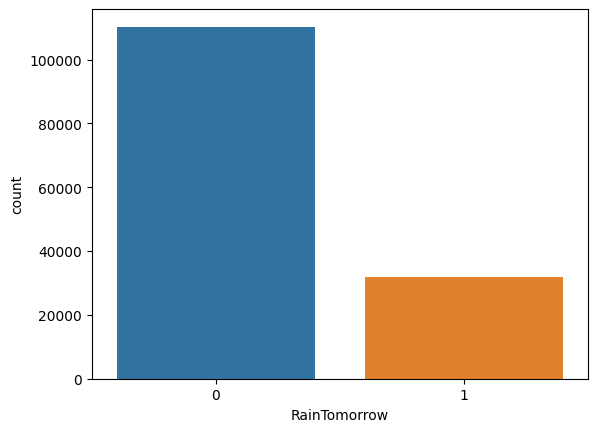

In [164]:
sns.countplot(x=weather['RainTomorrow'])

In [236]:
weather['WindGustDir'] = weather['WindGustDir'].fillna(weather['WindGustDir'].mode()[0])
weather['WindDir9am'] = weather['WindDir9am'].fillna(weather['WindDir9am'].mode()[0])
weather['WindDir3pm'] = weather['WindDir3pm'].fillna(weather['WindDir3pm'].mode()[0])

In [237]:
l = ['WindDir9am','WindDir3pm','WindGustDir','Location']
from sklearn.preprocessing import LabelEncoder
for i in l:
    labelenc = LabelEncoder()
    weather[i] = labelenc.fit_transform(weather[i])


In [238]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
ii = IterativeImputer()
weather.iloc[:,1:]=  ii.fit_transform(weather.iloc[:,1:])

In [332]:
X = weather.drop(['RainTomorrow'],axis =1 )
Y = weather['RainTomorrow']

In [55]:
!pip install imbalanced-learn

     -------------------------------------- 225.4/225.4 kB 2.8 MB/s eta 0:00:00


In [371]:
from sklearn.model_selection import TimeSeriesSplit
ts = TimeSeriesSplit()
for train_index, test_index in ts.split(X):
    X_train, X_test = X.iloc[train_index, :], X.iloc[test_index,:]
    y_train, y_test = Y.iloc[train_index],Y.iloc[test_index]

In [374]:
X_train['Date'] = pd.to_datetime(X_train['Date'],format='%m/%d/%Y')
X_train.set_index('Date',inplace= True)
X_test['Date'] = pd.to_datetime(X_test['Date'],format='%m/%d/%Y')
X_test.set_index('Date',inplace= True)

In [375]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42,k_neighbors= 5)
X_res, y_res = sm.fit_resample(X_train, y_train)

<AxesSubplot: xlabel='RainTomorrow', ylabel='count'>

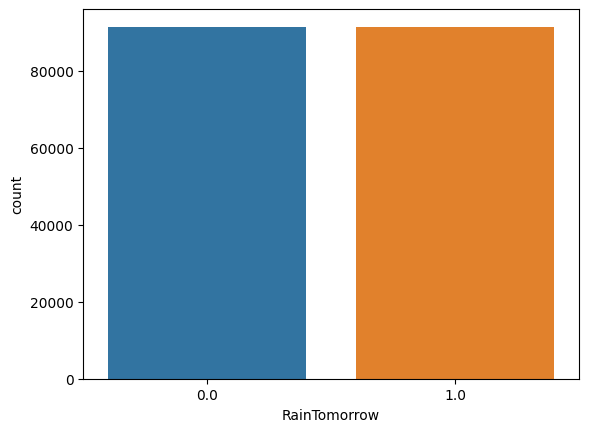

In [376]:

sns.countplot(x=y_res)

In [377]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_res = pd.DataFrame(scaler.fit_transform(X_res))
X_test = pd.DataFrame(scaler.transform(X_test),index=X_test.index, columns=X_test.columns)


In [336]:
y_train.shape

(182926,)

In [378]:
from sklearn.ensemble import RandomForestClassifier as rf
rf_model = rf(n_estimators=100, random_state=0)
rf_model.fit(X_res,y_res)

RandomForestClassifier(random_state=0)

In [379]:
y_pre = rf_model.predict(X_test)

In [380]:
from sklearn.metrics import accuracy_score, confusion_matrix,mean_squared_error
print(accuracy_score(y_test,y_pre))
print(confusion_matrix(y_test,y_pre))

0.9999578023461896
[[18853     0]
 [    1  4844]]
